In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

In [29]:
#load df
df= pd.read_csv("franchise_agg.csv")

In [30]:
#inspect df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   franchise_id        59 non-null     int64  
 1   franchise_name      59 non-null     object 
 2   Primary_Genres      59 non-null     object 
 3   Genres              59 non-null     object 
 4   Demographic         59 non-null     object 
 5   Themes              59 non-null     object 
 6   Avg_Weighted_Score  59 non-null     float64
 7   Best_Rank           59 non-null     int64  
 8   Top_Popularity      59 non-null     int64  
 9   Studio              59 non-null     object 
 10  Rating              59 non-null     object 
 11  Rating_Num          59 non-null     float64
 12  Status              59 non-null     object 
 13  Airing              59 non-null     bool   
 14  Start_Year          59 non-null     int64  
 15  Source              59 non-null     object 
 16  Types     

In [31]:
#helper function to explode & count
def explode_and_count_str(df, col, sep=","):
    #convert NaNs to empty string (so .str methods work)
    temp = df[col].fillna("")
    
    #split by separator, strip whitespace, remove empties
    temp = temp.apply(lambda x: [i.strip() for i in x.split(sep) if i.strip()]) 
    
    #explode a+nd count
    return temp.explode().value_counts()

## Genres

In [32]:
# explode primary genres
genre_counts = explode_and_count_str(df, 'Primary_Genres')
genre_counts = genre_counts.reset_index()
genre_counts.columns = ['Genre', 'Count']

top5_genres = genre_counts.head(5)

fig = px.bar(
    top5_genres,
    x='Count',
    y='Genre',
    orientation='h',
    color='Genre',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="My Most Watched (Primary) Genres"
)

fig.update_layout(
    xaxis_title="Number of Anime Franchises",
    yaxis_title="Genre",
    showlegend=False,
    height=800,
    width=1200, #change this to rectangle
    margin=dict(l=40, r=40, t=60, b=40),
    title=dict(
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    )
)
fig.show()

In [33]:
nexttop5_genres = genre_counts.iloc[5:10]

# plotly bar chart

fig = px.bar(
    nexttop5_genres,
    x='Count',
    y='Genre',
    orientation='h',
    color='Genre',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="My Second Most Watched Genres"
)

fig.update_layout(
    xaxis_title="Number of Anime Franchises",
    yaxis_title="Genre",
    showlegend=False,
    height=800,
    width=1200, 
    margin=dict(l=40, r=40, t=60, b=40),
    title=dict(
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    )
)
fig.show()

In [34]:
bottom5_genres = genre_counts.tail(5)

# plotly bar chart
fig = px.bar(
    bottom5_genres,
    x='Count',
    y='Genre',
    orientation='h',
    color='Genre',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title="My Least Watched Genres"
)

fig.update_layout(
    xaxis_title="Number of Animes",
    yaxis_title="Genre",
    showlegend=False,
    height=800,
    width= 1200,
    margin=dict(l=40, r=40, t=60, b=40),
    title=dict(
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    )
)

fig.show()

hmm - what are the bottom two? I'm guessing its Food wars?

In [35]:
#add code looking at ecchi and gourmet genres
df[df['Primary_Genres'].apply(lambda x: 'Ecchi' in x)]

,franchise_id,franchise_name,Primary_Genres,Genres,Demographic,Themes,Avg_Weighted_Score,Best_Rank,Top_Popularity,Studio,Rating,Rating_Num,Status,Airing,Start_Year,Source,Types,MAL_IDs
28,28171,Food Wars! Shokugeki no Soma,"Gourmet, Ecchi","Ecchi, Gourmet",Shounen,School,7.84,511,65,J.C.Staff,PG-13,2.0,Finished Airing,False,2015,Manga,"OVA, TV","28171, 31327, 32282"


# Demographics

In [36]:
#Count top demographics (almost 30% is unknown)
demo_counts = df[df['Demographic'] != "Unknown"]['Demographic'].value_counts().head(3)

demo_df = demo_counts.reset_index()
demo_df.columns = ['Demographic', 'Count']

fig = px.bar(
    demo_df,
    x='Count',
    y='Demographic',
    orientation='h',
    color='Demographic',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="My Top 3 Demographics"
)

fig.update_layout(
    xaxis_title="Number of Anime Franchises",
    yaxis_title="Demographic",
    showlegend=False,

    height=800,
    width=1200,
    margin=dict(l=40, r=40, t=60, b=40),    
    title=dict(
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    )
)

fig.show()

# Release Years

In [37]:
!pip install kaleido


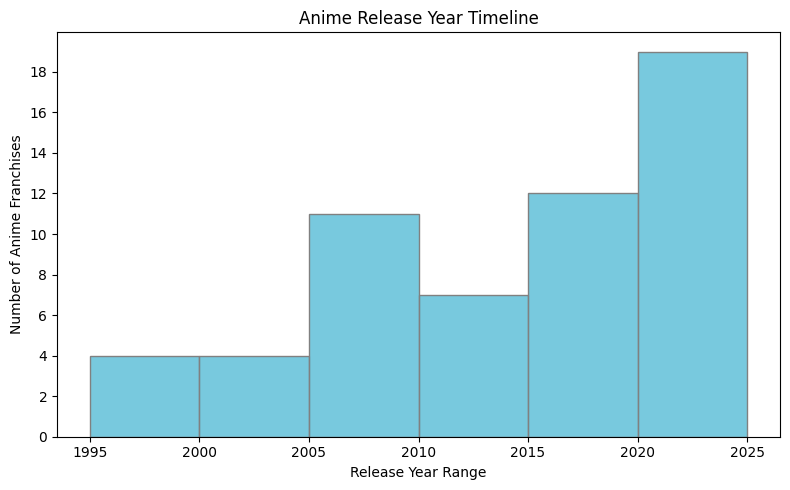

In [38]:
df['Start_Year'] = pd.to_numeric(df['Start_Year'], errors='coerce') #but 2006 was the year with most anime

df_years = df.dropna(subset=['Start_Year'])

plt.figure(figsize=(8, 5))
sns.histplot(data=df_years, x='Start_Year', bins=range(1995, 2030, 5), color='#4bb7d4', edgecolor='grey')


plt.title("Anime Release Year Timeline")
plt.xlabel("Release Year Range")
plt.ylabel("Number of Anime Franchises")
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

fig.update_layout(
    height=800,
    width=1200,
)
plt.tight_layout()
plt.show()

#plt.savefig('anime_timeline.png', dpi=300, bbox_inches='tight')

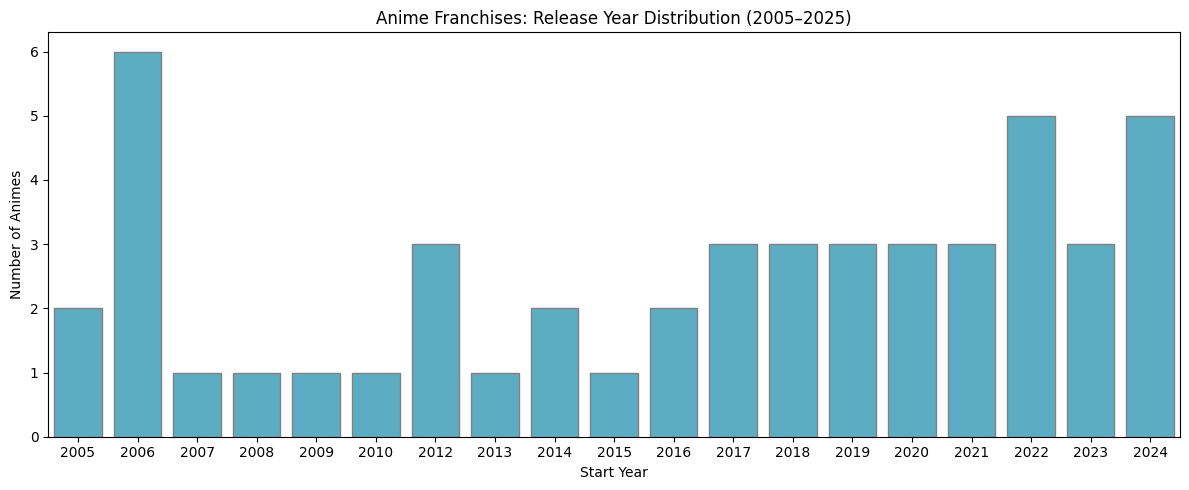

<Figure size 640x480 with 0 Axes>

In [39]:
# Clean and filter your data
df['Start_Year'] = pd.to_numeric(df['Start_Year'], errors='coerce')
df_years = df.dropna(subset=['Start_Year'])
df_filtered = df_years[(df_years['Start_Year'] >= 2005) & (df_years['Start_Year'] <= 2025)]

# Group by year and count
year_counts = df_filtered['Start_Year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=year_counts.index.astype(int), y=year_counts.values, color='#4bb7d4', edgecolor='grey')


plt.title("Anime Franchises: Release Year Distribution (2005–2025)")
plt.xlabel("Start Year")
plt.ylabel("Number of Animes")
# plt.xticks(rotation=45)

fig.update_layout(
    height=800,
    width=1200,
)
plt.tight_layout()
plt.show()

plt.savefig('year_wise_distribution.png', dpi=300, bbox_inches='tight')

In [40]:
#which ones are in that time period
df[df['Start_Year']== 2006]['franchise_name']

9           Ayakashi: Samurai Horror Tales
11                              Ergo Proxy
12             Ouran High School Host Club
13                            Black Lagoon
16                              Death Note
17    Code Geass: Lelouch of the Rebellion
Name: franchise_name, dtype: object

# Themes

In [41]:
#explode and clean up themes
theme_counts = explode_and_count_str(df, 'Themes')
theme_counts = theme_counts.reset_index()
theme_counts.columns = ['Theme', 'Count']
theme_counts = theme_counts[theme_counts['Theme'] != "Unknown"]
theme_counts

,Theme,Count
0,Adult Cast,16
1,School,15
2,Gore,12
3,Psychological,11
4,Historical,10
5,Parody,9
6,Organized Crime,7
7,Military,6
8,Time Travel,5
10,Super Power,5


In [42]:
top5_themes = theme_counts.head(5)

# Create plotly horizontal bar chart
fig = px.bar(
    top5_themes,
    x='Count',
    y='Theme',
    orientation='h',

    color='Theme',  # Gives a unique color per theme
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Optional: make it softer
)

# Clean up layout
fig.update_layout(
    title={
        'text': "Top 5 Themes in My Watch History",
        'x': 0.5,  # centers the title horizontally (0 = left, 1 = right)
        'xanchor': 'center',
        'font': dict(size=20)  # change 20 to any font size you like
    },
    xaxis_title="Number of Animes",
    yaxis_title="Theme",
    showlegend=False,
    height=800,
    width=1200,  
    margin=dict(l=40, r=40, t=60, b=40)
)

# Improve hover + text label placement
fig.update_traces(
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Count: %{x}<extra></extra>'
)

fig.show()

In [43]:
next5_themes = theme_counts.iloc[5:10]

# Create Plotly horizontal bar chart
fig = px.bar(
    next5_themes,
    x='Count',
    y='Theme',
    orientation='h',
    color='Theme',  # Gives a unique color per theme
    color_discrete_sequence=px.colors.qualitative.Pastel,  # Optional: make it softer
)

# Clean up layout
fig.update_layout(
    title={
        'text': "Next Top 5 Themes in My Watch History",
        'x': 0.5,  # centers the title horizontally (0 = left, 1 = right)
        'xanchor': 'center',
        'font': dict(size=20)  # change 20 to any font size you like
    },
    xaxis_title="Number of Anime Franchises",
    yaxis_title="Theme",
    showlegend=False,
    height=800,
    width=1200,  
    margin=dict(l=40, r=40, t=60, b=40)
)

# Improve hover + text label placement
fig.update_traces(
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Count: %{x}<extra></extra>'
)

fig.show()

# Anime Score vs Popularity

In [44]:
fig = px.scatter( #ramen akaneko left out)
    df,
    x='Avg_Weighted_Score',
    y='Top_Popularity',
    color='Primary_Genres',
    hover_name='franchise_name',
    hover_data={
        'Avg_Weighted_Score': True,
        'Top_Popularity': True,
        'Primary_Genres': True
    },
    labels={
        'Avg_Weighted_Score': 'Average Weighted Score',
        'Top_Popularity': 'Popularity Rank',
        'Primary_Genres': 'Genres'
    }
)
fig.update_layout( title={
        'text': "Anime Score vs Popularity",
        'x': 0.5,  # centers the title horizontally (0 = left, 1 = right)
        'xanchor': 'center',
        'font': dict(size=20)  # change 20 to any font size you like
    },)
fig.update_yaxes(range=[2500, -100])

\
fig.show()